# Data Analysis for Domain Data

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import os

# Set up visualization settings
plt.rcParams['figure.figsize'] = (12, 8)

## Load the data
# Path to data folder
data_path = "../data"
data_targets_name = 'keyword analysis - mapping.csv'
data_features_name = 'keyword analysis - domain ad info.csv'
data_texts_name = 'domains.csv'

# List files in the data directory
print("Files in the data directory:")
files = os.listdir(data_path)
for file in files:
    print(f"- {file}")

# Load domain data with targets
domain_targets_file = os.path.join(data_path, data_targets_name)
targets = pd.read_csv(domain_targets_file)
display(targets.head())
print(f"Shape: {targets.shape}")

# Load feature data without targets
features_file = os.path.join(data_path, data_features_name)
features = pd.read_csv(features_file)
display(features.head())
print(f"Shape: {features.shape}")

# Load feature data without targets
texts_file = os.path.join(data_path, data_texts_name)
texts = pd.read_csv(texts_file)
display(texts.head())
print(f"Shape: {texts.shape}")

Files in the data directory:
- domains.csv
- keyword analysis - mapping.csv
- keyword analysis - domain ad info.csv


,domain,category
0,airbyte.com,competition
1,amazon.com,competition
2,ascend.io,competition
3,aws.amazon.com,competition
4,azure.microsoft.com,competition


Shape: (162, 2)


,domain,occurrences,domainTrackersFound,Adform_Requests,google_proportion,doubleclick_proportion,adform_proportion,appnexus_proportion,rubicon_proportion,index_exchange_proportion,pubmatic_proportion,tradedesk_proportion,mediamath_proportion
0,bing.com,243,True,39806000,0.038865,0.035448,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,youtube.com,190,True,1000,0.970524,0.902628,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,hevodata.com,75,False,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,linkedin.com,65,True,0,0.154023,0.043069,NaN,0.020333,0.083409,NaN,NaN,NaN,NaN
4,reddit.com,63,True,31000,0.558241,0.024116,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Shape: (1727, 13)


,domain,url,category,is_corporation,is_organization,is_local_business,is_education,is_service,is_media,is_blog,is_forum,is_directory,is_product,name,description,textContent,phone,email
0,01net.it,https://www.01net.it/contact-center-a-zero-pro...,media,NaN,True,NaN,False,NaN,True,False,False,False,False,01net,È l'obiettivo di PerformanceEdge di Aspect So...,* Apple\n * Cloud\n * IoT\n * Prodotti\n * H...,NaN,NaN
1,01net.it,https://www.01net.it/,NaN,NaN,NaN,NaN,False,NaN,False,False,False,False,False,01net,"News, visioni, strategie, implementazioni: co...",* Apple\n * Cloud\n * IoT\n * Prodotti\n * H...,NaN,NaN
2,01net.it,https://www.01net.it/bigquery-metastore-la-nuo...,media,NaN,True,NaN,False,NaN,True,False,False,False,False,01net,BigQuery Metastore di Google Cloud semplifica...,* Apple\n * Cloud\n * IoT\n * Prodotti\n * H...,NaN,NaN
3,2cloud.io,https://2cloud.io/contact,NaN,NaN,NaN,NaN,False,NaN,False,False,False,False,NaN,2Cloud - Contact Us,Get in touch with our friendly customer suppo...,+ Hours Of Managed Cloud Services\nConnect Wi...,NaN,NaN
4,2cloud.io,https://2cloud.io/blog/how-to-conduct-ecommerc...,NaN,NaN,NaN,NaN,False,NaN,False,True,False,False,NaN,How to Conduct E-commerce Competitor Analysis,Learn how to conduct an e-commerce competitor...,+ Hours Of Managed Cloud Services\nConnect Wi...,NaN,NaN


Shape: (8099, 18)


# Count of occurrences for each category

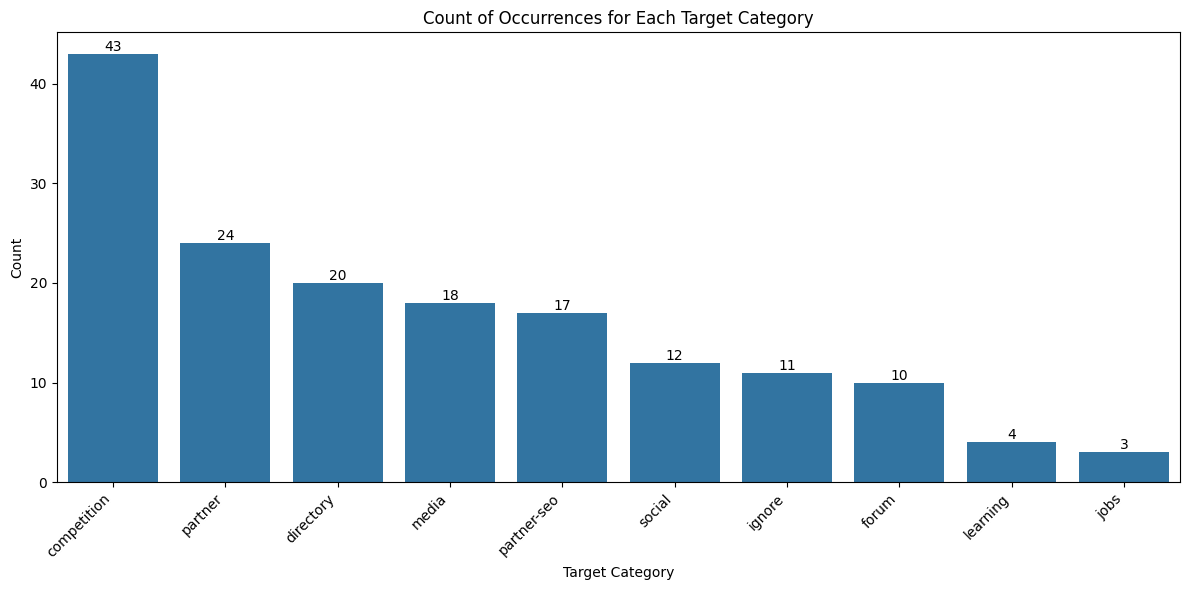

In [3]:
# Add barplot of target names - count of occurrences for each category using Seaborn
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=targets, x='category', order=targets['category'].value_counts().index)
plt.title('Count of Occurrences for Each Target Category')
plt.xlabel('Target Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width()/2., p.get_height()), 
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

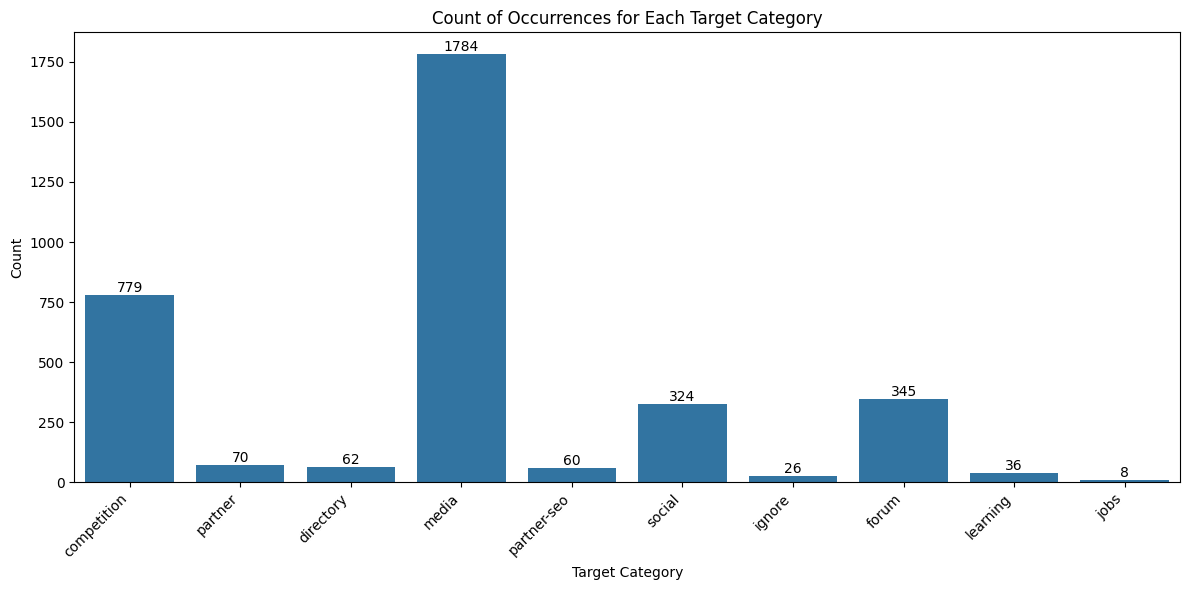

In [4]:
# Add barplot of target names - count of occurrences for each category using Seaborn
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=texts, x='category', order=targets['category'].value_counts().index)
plt.title('Count of Occurrences for Each Target Category')
plt.xlabel('Target Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width()/2., p.get_height()), 
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [5]:
import pandas as pd

# Filter texts dataframe to get shortest root URLs for each domain
def is_root_url(url):
    # Check if URL is in root format (no subpages)
    # Removes 'https://' or 'http://' and counts remaining '/'
    clean_url = url.replace('https://', '').replace('http://', '')
    return clean_url.count('/') <= 1

# Print initial diagnostics
print("Number of unique domains in texts:", texts['domain'].nunique())
print("Number of unique domains in domain_targets:", domain_targets['domain'].nunique())

# Group by domain and get shortest root URL along with its description and textContent
filtered_texts = (texts[texts['url'].notna() & texts['url'].apply(is_root_url)]
                 .sort_values('url')
                 .groupby('domain')
                 .agg({
                     'url': lambda x: min(x, key=len),
                     'description': 'first',
                     'textContent': 'first'
                 })
                 .reset_index())

print("\nNumber of unique domains after filtering:", filtered_texts['domain'].nunique())

# Check for missing matches
missing_domains = targets[~targets['domain'].isin(filtered_texts['domain'])]
print("\nNumber of domains without matches:", len(missing_domains))
print("\nSample of domains without matches:")
missing_domains['domain'].head()

# Now proceed with the merge
merged_data = pd.merge(targets, filtered_texts, on='domain', how='outer')
print(f"\nMerged data shape: {merged_data.shape}")

# Check percentage of NaN values
nan_percentage = (merged_data['url'].isna().sum() / len(merged_data)) * 100
print(f"\nPercentage of NaN values in URL column: {nan_percentage:.2f}%")

Number of unique domains in texts: 1762


NameError: name 'domain_targets' is not defined

In [29]:
pd.set_option('display.max_rows', 10)
filtered_texts

,domain,url,description,textContent
0,01net.it,https://www.01net.it/,"News, visioni, strategie, implementazioni: co...",* Apple\n * Cloud\n * IoT\n * Prodotti\n * H...
1,2cloud.io,https://2cloud.io/,We provides innovative cloud technology - ena...,+ Hours Of Managed Cloud Services\nConnect Wi...
2,365datascience.com,https://365datascience.com/,"365 Data Science offers data science, machine...",* Learn\n * Courses\n * Career Tracks\n ...
3,42signals.com,https://www.42signals.com/,Unlock Ecommerce insights to enhance product ...,* ABOUT\n * OUR SUITE\n * Digital Shelf Anal...
4,5x.co,https://www.5x.co/,An all-in-one solution for AI and data analyt...,5X named Leader in DataOps!\n5X named Leader i...
...,...,...,...,...
1606,zluri.com,https://www.zluri.com/,"Discover identities and applications, streaml...","[Webinar Alert] Featuring Gen AI Discovery, Pr..."
1607,zoho.com,https://www.zoho.com/,A unique and powerful software suite for busi...,"YOUR LIFE'S WORK, POWERED BY OUR LIFE'S WORK\n..."
1608,zoovu.com,https://zoovu.com/,Zoovu is empowering people to find the product...,* Why Zoovu\n * Platform\n \n * * * PLATF...
1609,zuar.com,https://www.zuar.com/,Automate your data pipeline! From ETL process...,* PRODUCTS\n * Zuar Portal Drag & drop port...


In [42]:
texts

,domain,url,category,is_corporation,is_organization,is_local_business,is_education,is_service,is_media,is_blog,is_forum,is_directory,is_product,name,description,textContent,phone,email
0,01net.it,https://www.01net.it/contact-center-a-zero-pro...,media,NaN,True,NaN,False,NaN,True,False,False,False,False,01net,È l'obiettivo di PerformanceEdge di Aspect So...,* Apple\n * Cloud\n * IoT\n * Prodotti\n * H...,NaN,NaN
1,01net.it,https://www.01net.it/,NaN,NaN,NaN,NaN,False,NaN,False,False,False,False,False,01net,"News, visioni, strategie, implementazioni: co...",* Apple\n * Cloud\n * IoT\n * Prodotti\n * H...,NaN,NaN
2,01net.it,https://www.01net.it/bigquery-metastore-la-nuo...,media,NaN,True,NaN,False,NaN,True,False,False,False,False,01net,BigQuery Metastore di Google Cloud semplifica...,* Apple\n * Cloud\n * IoT\n * Prodotti\n * H...,NaN,NaN
3,2cloud.io,https://2cloud.io/contact,NaN,NaN,NaN,NaN,False,NaN,False,False,False,False,NaN,2Cloud - Contact Us,Get in touch with our friendly customer suppo...,+ Hours Of Managed Cloud Services\nConnect Wi...,NaN,NaN
4,2cloud.io,https://2cloud.io/blog/how-to-conduct-ecommerc...,NaN,NaN,NaN,NaN,False,NaN,False,True,False,False,NaN,How to Conduct E-commerce Competitor Analysis,Learn how to conduct an e-commerce competitor...,+ Hours Of Managed Cloud Services\nConnect Wi...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8094,zuar.com,https://www.zuar.com/,NaN,NaN,True,NaN,False,NaN,False,False,False,False,False,"Zuar, Inc.",Automate your data pipeline! From ETL process...,* PRODUCTS\n * Zuar Portal Drag & drop port...,8889886699,NaN
8095,zuar.com,https://www.zuar.com/about/,NaN,NaN,True,NaN,False,NaN,False,False,False,False,False,"Zuar, Inc.",Zuar is on a mission to help everyone solve p...,* PRODUCTS\n * Zuar Portal Drag & drop port...,8889886699,NaN
8096,zuar.com,https://www.zuar.com/blog/what-is-etl-pipeline/,NaN,NaN,True,NaN,False,NaN,True,True,False,False,False,Zuar,In this helpful guide we'll discuss what an E...,* PRODUCTS\n * Zuar Portal Drag & drop port...,NaN,NaN
8097,zuinnote.eu,https://zuinnote.eu/blog/?p=2126,NaN,NaN,NaN,NaN,NaN,NaN,False,True,False,False,NaN,"Revisiting Big Data Formats: Apache Iceberg, D...",,Zukunft-Innovation-Technik (ZuInnoTe) – Digita...,NaN,NaN


In [41]:
train_data = pd.merge(texts, targets, on='domain', how='right')

print(f"Original texts shape: {texts.shape}")
print(f"Original domain_targets shape: {targets.shape}")
print(f"Merged data shape: {train_data.shape}")
print("\nSample of merged data:")
train_data.head()

Original texts shape: (8099, 18)
Original domain_targets shape: (162, 2)
Merged data shape: (1609, 19)

Sample of merged data:


,domain,url,category_x,is_corporation,is_organization,is_local_business,is_education,is_service,is_media,is_blog,is_forum,is_directory,is_product,name,description,textContent,phone,email,category_y
0,airbyte.com,https://airbyte.com/top-etl-tools-for-sources/...,competition,NaN,NaN,NaN,False,NaN,False,True,False,False,False,11 Best AWS ETL Tools to Integrate Cloud Data ...,Discover the best AWS ETL tools in 2025 to st...,Reserve your spot at move(data) 2025 now. Spac...,NaN,NaN,competition
1,airbyte.com,https://airbyte.com/etl-tools/hevo-data-vs-fiv...,competition,NaN,NaN,NaN,False,NaN,False,True,False,False,False,Hevo Data vs Fivetran: The Ultimate ETL Face-Off,Airbyte is a perfect alternative to Hevo and ...,Reserve your spot at move(data) 2025 now. Spac...,NaN,NaN,competition
2,airbyte.com,https://airbyte.com/how-to-sync/facebook-ads-t...,competition,NaN,NaN,NaN,False,NaN,False,True,False,False,False,How to Connect & Load Data from Facebook Marke...,Integrate Facebook Marketing to Snowflake des...,Reserve your spot at move(data) 2025 now. Spac...,NaN,NaN,competition
3,airbyte.com,https://airbyte.com/data-engineering-resources...,competition,NaN,NaN,NaN,False,NaN,False,True,False,False,False,SQL vs NoSQL: A Comparison of Database Technol...,Understand the key differences between SQL an...,Reserve your spot at move(data) 2025 now. Spac...,NaN,NaN,competition
4,airbyte.com,https://airbyte.com/data-engineering-resources...,competition,NaN,NaN,NaN,False,NaN,False,True,False,False,False,What is Data Automation: Uses & Benefits | Air...,Discover the power of data automation. Explor...,Reserve your spot at move(data) 2025 now. Spac...,NaN,NaN,competition


In [17]:
texts.head()

,domain,url,category,is_corporation,is_organization,is_local_business,is_education,is_service,is_media,is_blog,is_forum,is_directory,is_product,name,description,textContent,phone,email
0,01net.it,https://www.01net.it/contact-center-a-zero-pro...,media,NaN,True,NaN,False,NaN,True,False,False,False,False,01net,È l'obiettivo di PerformanceEdge di Aspect So...,* Apple\n * Cloud\n * IoT\n * Prodotti\n * H...,NaN,NaN
1,01net.it,https://www.01net.it/,NaN,NaN,NaN,NaN,False,NaN,False,False,False,False,False,01net,"News, visioni, strategie, implementazioni: co...",* Apple\n * Cloud\n * IoT\n * Prodotti\n * H...,NaN,NaN
2,01net.it,https://www.01net.it/bigquery-metastore-la-nuo...,media,NaN,True,NaN,False,NaN,True,False,False,False,False,01net,BigQuery Metastore di Google Cloud semplifica...,* Apple\n * Cloud\n * IoT\n * Prodotti\n * H...,NaN,NaN
3,2cloud.io,https://2cloud.io/contact,NaN,NaN,NaN,NaN,False,NaN,False,False,False,False,NaN,2Cloud - Contact Us,Get in touch with our friendly customer suppo...,+ Hours Of Managed Cloud Services\nConnect Wi...,NaN,NaN
4,2cloud.io,https://2cloud.io/blog/how-to-conduct-ecommerc...,NaN,NaN,NaN,NaN,False,NaN,False,True,False,False,NaN,How to Conduct E-commerce Competitor Analysis,Learn how to conduct an e-commerce competitor...,+ Hours Of Managed Cloud Services\nConnect Wi...,NaN,NaN


In [43]:
# Merge data
train_data = pd.merge(texts, targets, on='domain', how='right')

# Use pandas coalesce to combine category_x and category_y
train_data['category'] = pd.concat([train_data['category_x'], train_data['category_y']]).groupby(level=0).first()

In [48]:
pd.set_option('display.max_rows', 50)
train_data[train_data['category_y'] != train_data['category_x']].head(n=30)

,domain,url,category_x,is_corporation,is_organization,is_local_business,is_education,is_service,is_media,is_blog,is_forum,is_directory,is_product,name,description,textContent,phone,email,category_y,category
109,azure.microsoft.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,competition,competition
398,incorta.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,competition,competition
589,prefect.io,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,competition,competition
759,y42.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,competition,competition
786,alternativeto.net,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,directory,directory
789,capterra.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,directory,directory
792,datarade.ai,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,directory,directory
800,getapp.co.au,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,directory,directory
801,getapp.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,directory,directory
802,getapp.sg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,directory,directory


In [49]:
texts.head()

,domain,url,category,is_corporation,is_organization,is_local_business,is_education,is_service,is_media,is_blog,is_forum,is_directory,is_product,name,description,textContent,phone,email
0,01net.it,https://www.01net.it/contact-center-a-zero-pro...,media,NaN,True,NaN,False,NaN,True,False,False,False,False,01net,È l'obiettivo di PerformanceEdge di Aspect So...,* Apple\n * Cloud\n * IoT\n * Prodotti\n * H...,NaN,NaN
1,01net.it,https://www.01net.it/,NaN,NaN,NaN,NaN,False,NaN,False,False,False,False,False,01net,"News, visioni, strategie, implementazioni: co...",* Apple\n * Cloud\n * IoT\n * Prodotti\n * H...,NaN,NaN
2,01net.it,https://www.01net.it/bigquery-metastore-la-nuo...,media,NaN,True,NaN,False,NaN,True,False,False,False,False,01net,BigQuery Metastore di Google Cloud semplifica...,* Apple\n * Cloud\n * IoT\n * Prodotti\n * H...,NaN,NaN
3,2cloud.io,https://2cloud.io/contact,NaN,NaN,NaN,NaN,False,NaN,False,False,False,False,NaN,2Cloud - Contact Us,Get in touch with our friendly customer suppo...,+ Hours Of Managed Cloud Services\nConnect Wi...,NaN,NaN
4,2cloud.io,https://2cloud.io/blog/how-to-conduct-ecommerc...,NaN,NaN,NaN,NaN,False,NaN,False,True,False,False,NaN,How to Conduct E-commerce Competitor Analysis,Learn how to conduct an e-commerce competitor...,+ Hours Of Managed Cloud Services\nConnect Wi...,NaN,NaN
